<a href="https://colab.research.google.com/github/stanvanrooy/all-contributors/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from tqdm import trange

In [ ]:
test = pd.read_csv("sample_data/mnist_test.csv").to_numpy()
train = pd.read_csv("sample_data/mnist_train_small.csv").to_numpy()

test_imgs = test[::, 1::]
test_labels = test[::, :1]

train_imgs = train[::, 1::]
train_labels = train[::, :1]

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(784, 128)
    self.act = nn.ReLU()
    self.l2 = nn.Linear(128, 10)

  def forward(self, x):
    x = self.l1(x)
    x = self.act(x)
    x = self.l2(x)
    return x


In [137]:
model = Net()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

losses = []
accuracies = []

bs = 32

r = trange(300)
for i in r:
  samp = np.random.randint(0, train_imgs.shape[0], size=(bs))
  imgs = torch.tensor(train_imgs[samp]).float()
  labels = torch.tensor(train_labels[samp].flatten())
  out = model(imgs)
  optimizer.zero_grad()

  cat = torch.argmax(out, dim=1)
  accuracy = (cat == labels).float().mean()

  loss = loss_function(out, labels)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())
  accuracies.append(accuracy.item())
  r.set_description(f"loss: {loss.item()}; accuracy: {accuracy.item()}")

loss: 0.04395178705453873; accuracy: 0.96875: 100%|██████████| 300/300 [00:02<00:00, 115.24it/s]


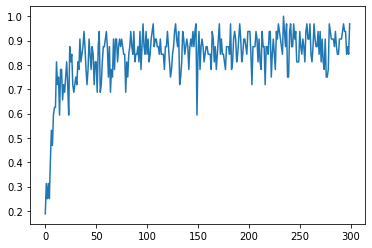

In [139]:
plt.plot(accuracies)

In [ ]:
out = model(torch.tensor(test_imgs).float())
cat = torch.argmax(out, dim=1)
labels = torch.tensor(test_labels.flatten())
accuracy = (cat == labels).float().mean()
print(accuracy)

tensor(0.9147)


[3] 3


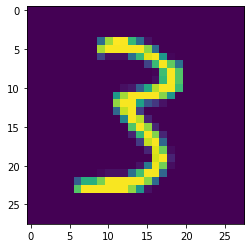

In [144]:
idx = 322
img = test_imgs[idx]
label = test_labels[idx]
plt.imshow(img.reshape(28, 28))
out = model(torch.tensor(img).float())
print(label, torch.argmax(out).item())